# Compare descriptions of the marginalised posterior

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from lace_manager.likelihood import marg_p1d_like

will setup marg_p1d from grid file kde_igm_8_cut_50.npz


/Users/font/opt/anaconda3/envs/lace_env/lib/python3.8/site-packages/lace_manager-1.0.1-py3.8.egg/lace_manager/likelihood/marg_p1d_like.py:139: RuntimeWarning: invalid value encountered in log


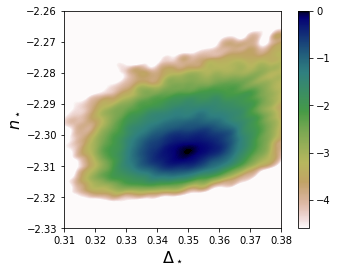

In [2]:
# 8 IGM parameters
reduced_IGM=False
if reduced_IGM:
    kde_fname='kde_igm_1_cut_50.npz'
else:
    kde_fname='kde_igm_8_cut_50.npz'
kde_marg_p1d=marg_p1d_like.MargP1DLike(grid_fname=kde_fname)
kde_marg_p1d.plot_log_like()

# KDE from Gaussian

will setup Gaussian marg_p1d


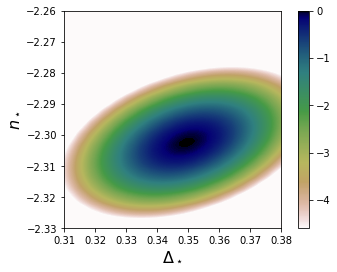

In [3]:
gauss_marg_p1d=marg_p1d_like.MargP1DLike(sim_label="central",reduced_IGM=reduced_IGM,polyfit=True)
gauss_marg_p1d.plot_log_like()

In [4]:
def write_kde_from_Gauss(gauss_marg_p1d,fname='test_gauss_kde.npz',Nsigmas=4,Nbins=40):
    # figure out Gaussian mean and rms
    mean_x,mean_y=gauss_marg_p1d.Gauss_mean
    Gauss_cov=np.linalg.inv(gauss_marg_p1d.Gauss_icov)
    rms_x,rms_y=np.sqrt(Gauss_cov.diagonal())
    xmin = mean_x - Nsigmas*rms_x
    xmax = mean_x + Nsigmas*rms_x
    ymin = mean_y - Nsigmas*rms_y
    ymax = mean_y + Nsigmas*rms_y
    print('{:.3f} < Delta2_star < {:.3f}'.format(xmin,xmax))
    print('{:.3f} < n_star < {:.3f}'.format(ymin,ymax))
    # setup regular 2D grid for KDE
    Nj=complex(0,Nbins)
    X, Y = np.mgrid[xmin:xmax:Nj, ymin:ymax:Nj]
    Z = np.empty_like(X)
    for ix in range(Nbins):
        for iy in range(Nbins):
            log_like = gauss_marg_p1d.get_log_like(Delta2_star=X[ix,iy],n_star=Y[ix,iy])
            # Z here should be density (likelihood)
            Z[ix,iy] = np.exp(log_like)
    np.savez(fname,D2_star=np.unique(X),n_star=np.unique(Y),density=Z)

In [5]:
write_kde_from_Gauss(gauss_marg_p1d,Nsigmas=4,Nbins=40)

0.296 < Delta2_star < 0.403
-2.335 < n_star < -2.270


will setup marg_p1d from grid file test_gauss_kde.npz


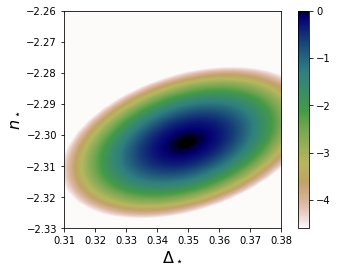

In [6]:
gauss_kde_marg_p1d=marg_p1d_like.MargP1DLike(grid_fname='test_gauss_kde.npz')
gauss_kde_marg_p1d.plot_log_like()

# Gaussianized posterior by Nick Gnedin

In [7]:
gnedin_marg_p1d=marg_p1d_like.MargP1DLike(Gnedin=True,sim_label="central",reduced_IGM=reduced_IGM,polyfit=True)

will setup Gaussianized marg_p1d


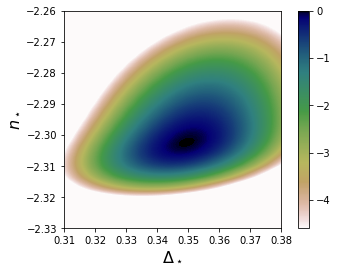

In [8]:
gnedin_marg_p1d.plot_log_like()

# Profile Likelihood (likelihood scan)

will setup marg_p1d from grid file scan_igm_8.npz


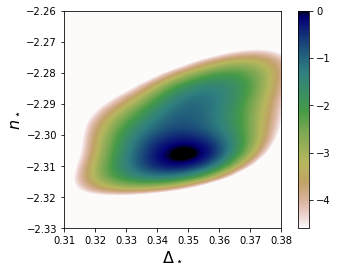

In [9]:
scan_marg_p1d=marg_p1d_like.MargP1DLike(grid_fname='scan_igm_8.npz')
scan_marg_p1d.plot_log_like()

# Compare Gaussian vs KDE vs Gnedin

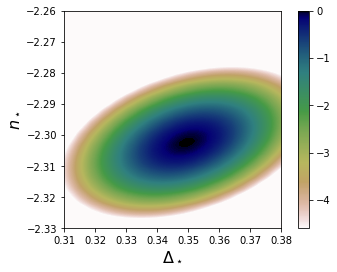

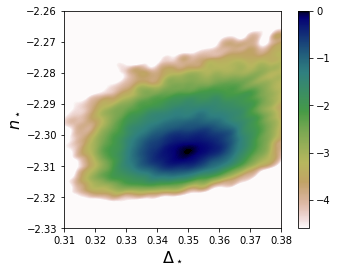

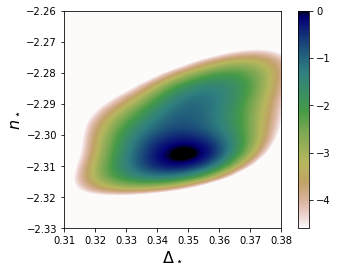

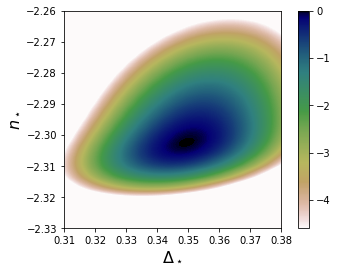

In [10]:
gauss_marg_p1d.plot_log_like()
kde_marg_p1d.plot_log_like()
scan_marg_p1d.plot_log_like()
gnedin_marg_p1d.plot_log_like()

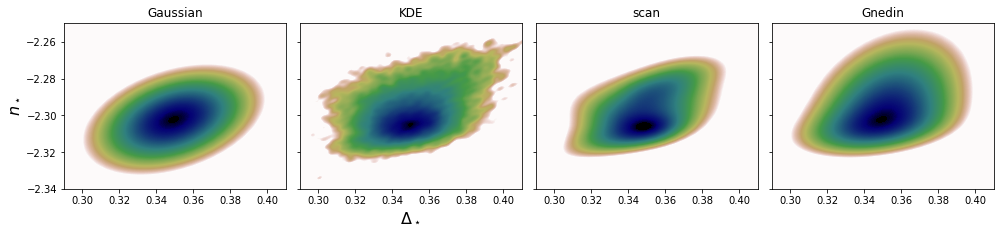

In [11]:
# range to plot
min_Delta2_star=0.29
max_Delta2_star=0.41
min_n_star=-2.34
max_n_star=-2.25
# number of points per dimension
Nj=200j
X, Y = np.mgrid[min_Delta2_star:max_Delta2_star:Nj,min_n_star:max_n_star:Nj]
N=int(Nj.imag)
assert X.shape==(N,N)
# 4 sub-plot (Gaussian, KDE, scan, Gnedin)
fig, axs = plt.subplots(1,4,figsize=(14,6),sharey=True)
Z_gauss = np.empty_like(X)
Z_kde = np.empty_like(X)
Z_scan = np.empty_like(X)
Z_gnedin = np.empty_like(X)
for ix in range(N):
    for iy in range(N):
        Z_gauss[ix,iy] = gauss_marg_p1d.get_log_like(Delta2_star=X[ix,iy],n_star=Y[ix,iy])
        Z_kde[ix,iy] = kde_marg_p1d.get_log_like(Delta2_star=X[ix,iy],n_star=Y[ix,iy])
        Z_scan[ix,iy] = scan_marg_p1d.get_log_like(Delta2_star=X[ix,iy],n_star=Y[ix,iy])
        Z_gnedin[ix,iy] = gnedin_marg_p1d.get_log_like(Delta2_star=X[ix,iy],n_star=Y[ix,iy])
        #Z_gnedin[ix,iy] = gauss_kde_marg_p1d.get_log_like(Delta2_star=X[ix,iy],n_star=Y[ix,iy])
# specify color map and range
plot_min_prob=0.001
cmap=plt.cm.gist_earth_r
extent=[min_Delta2_star,max_Delta2_star,min_n_star,max_n_star]
axs[0].imshow(np.rot90(Z_gauss),cmap=cmap,extent=extent,vmin=np.log(plot_min_prob),vmax=0.0)
axs[0].set_title('Gaussian')
axs[1].imshow(np.rot90(Z_kde),cmap=cmap,extent=extent,vmin=np.log(plot_min_prob),vmax=0.0)
axs[1].set_title('KDE')
axs[2].imshow(np.rot90(Z_scan),cmap=cmap,extent=extent,vmin=np.log(plot_min_prob),vmax=0.0)
axs[2].set_title('scan')
axs[3].imshow(np.rot90(Z_gnedin),cmap=cmap,extent=extent,vmin=np.log(plot_min_prob),vmax=0.0)
axs[3].set_title('Gnedin')
axs[1].set_xlabel(r'$\Delta_\star$',fontsize=16)
axs[0].set_ylabel(r'$n_\star$',fontsize=16)
plt.tight_layout()
plt.savefig('compare_marg.png')